# Identitas Developer
> Nama : Muhammad Fadhil Amri <br>
> Email : fadhil.amri131202@gmail.com <br>
> Domisili: Kota Bandung <br>
> Pekerjaan : Mahasiswa Teknik Informatika ITB <br>


# Intro
> Proyek ini adalah proyek Machine Learning dalam membuat recommender system menggunakan content-based filtering dan colaborative filtering <br><br>

# Program

## 1. Import Data

Sumber Data: https://www.kaggle.com/datasets/aprabowo/indonesia-tourism-destination

In [139]:
import gdown

URL_DATA_RATING = "https://drive.google.com/uc?id=1rgwNp7OP4GjI3AJUYrWbGdVigcIarjjL"
gdown.download(URL_DATA_RATING, "rating.csv")
URL_DATA_DESTINASI = "https://drive.google.com/uc?id=1rfFApK8NSaeks7kOjxkk5hp04gdvQuvi"
gdown.download(URL_DATA_DESTINASI, "destinasi.csv")
URL_DATA_USER = "https://drive.google.com/uc?id=1raZbYS4Q9VNxh-yOfWh4VwKv6CPKPtgq"
gdown.download(URL_DATA_USER, "user.csv")


Downloading...
From: https://drive.google.com/uc?id=1rgwNp7OP4GjI3AJUYrWbGdVigcIarjjL
To: /content/rating.csv
100%|██████████| 104k/104k [00:00<00:00, 94.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1rfFApK8NSaeks7kOjxkk5hp04gdvQuvi
To: /content/destinasi.csv
100%|██████████| 366k/366k [00:00<00:00, 80.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1raZbYS4Q9VNxh-yOfWh4VwKv6CPKPtgq
To: /content/user.csv
100%|██████████| 9.22k/9.22k [00:00<00:00, 20.2MB/s]


'user.csv'

## 2. Load Data

In [140]:
import pandas as pd

rating = pd.read_csv("/content/rating.csv")
destinasi = pd.read_csv("/content/destinasi.csv")
user = pd.read_csv("/content/user.csv")

print("Jumlah Data Rating Destinasi Wisata: ", rating.shape[0])
print("Jumlah Data Tempat Destinasi Wisata: ", destinasi.shape[0])
print("Jumlah Data User: ", user.shape[0])

Jumlah Data Rating Destinasi Wisata:  10000
Jumlah Data Tempat Destinasi Wisata:  437
Jumlah Data User:  300


In [141]:
rating.head()

,User_Id,Place_Id,Place_Ratings
0,1,179,3
1,1,344,2
2,1,5,5
3,1,373,3
4,1,101,4


In [142]:
destinasi.head()

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12
0,1,Monumen Nasional,Monumen Nasional atau yang populer disingkat d...,Budaya,Jakarta,20000,4.6,15.0,"{'lat': -6.1753924, 'lng': 106.8271528}",-6.175392,106.827153,NaN,1
1,2,Kota Tua,"Kota tua di Jakarta, yang juga bernama Kota Tu...",Budaya,Jakarta,0,4.6,90.0,"{'lat': -6.137644799999999, 'lng': 106.8171245}",-6.137645,106.817125,NaN,2
2,3,Dunia Fantasi,Dunia Fantasi atau disebut juga Dufan adalah t...,Taman Hiburan,Jakarta,270000,4.6,360.0,"{'lat': -6.125312399999999, 'lng': 106.8335377}",-6.125312,106.833538,NaN,3
3,4,Taman Mini Indonesia Indah (TMII),Taman Mini Indonesia Indah merupakan suatu kaw...,Taman Hiburan,Jakarta,10000,4.5,NaN,"{'lat': -6.302445899999999, 'lng': 106.8951559}",-6.302446,106.895156,NaN,4
4,5,Atlantis Water Adventure,Atlantis Water Adventure atau dikenal dengan A...,Taman Hiburan,Jakarta,94000,4.5,60.0,"{'lat': -6.12419, 'lng': 106.839134}",-6.124190,106.839134,NaN,5


In [143]:
user.head()

,User_Id,Location,Age
0,1,"Semarang, Jawa Tengah",20
1,2,"Bekasi, Jawa Barat",21
2,3,"Cirebon, Jawa Barat",23
3,4,"Bekasi, Jawa Barat",21
4,5,"Lampung, Sumatera Selatan",20


## 3. Exploratory Data Analysis

### Statistika Deskriptif

In [144]:
destinasi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 437 entries, 0 to 436
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Place_Id      437 non-null    int64  
 1   Place_Name    437 non-null    object 
 2   Description   437 non-null    object 
 3   Category      437 non-null    object 
 4   City          437 non-null    object 
 5   Price         437 non-null    int64  
 6   Rating        437 non-null    float64
 7   Time_Minutes  205 non-null    float64
 8   Coordinate    437 non-null    object 
 9   Lat           437 non-null    float64
 10  Long          437 non-null    float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   437 non-null    int64  
dtypes: float64(5), int64(3), object(5)
memory usage: 44.5+ KB


In [145]:
destinasi.describe()

,Place_Id,Price,Rating,Time_Minutes,Lat,Long,Unnamed: 11,Unnamed: 12
count,437.000000,437.000000,437.000000,205.000000,437.000000,437.000000,0.0,437.000000
mean,219.000000,24652.173913,4.442792,82.609756,-7.095438,109.160142,NaN,219.000000
std,126.295289,66446.374709,0.208587,52.872339,0.727241,1.962848,NaN,126.295289
min,1.000000,0.000000,3.400000,10.000000,-8.197894,103.931398,NaN,1.000000
25%,110.000000,0.000000,4.300000,45.000000,-7.749590,107.578369,NaN,110.000000
50%,219.000000,5000.000000,4.500000,60.000000,-7.020524,110.237468,NaN,219.000000
75%,328.000000,20000.000000,4.600000,120.000000,-6.829411,110.431869,NaN,328.000000
max,437.000000,900000.000000,5.000000,360.000000,1.078880,112.821662,NaN,437.000000


In [146]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   User_Id        10000 non-null  int64
 1   Place_Id       10000 non-null  int64
 2   Place_Ratings  10000 non-null  int64
dtypes: int64(3)
memory usage: 234.5 KB


In [147]:
rating.describe()

,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,3.066500
std,86.137374,126.228335,1.379952
min,1.000000,1.000000,1.000000
25%,77.000000,108.750000,2.000000
50%,151.000000,220.000000,3.000000
75%,226.000000,329.000000,4.000000
max,300.000000,437.000000,5.000000


In [148]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   User_Id   300 non-null    int64 
 1   Location  300 non-null    object
 2   Age       300 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.2+ KB


In [149]:
user.describe()

,User_Id,Age
count,300.000000,300.000000
mean,150.500000,28.700000
std,86.746758,6.393716
min,1.000000,18.000000
25%,75.750000,24.000000
50%,150.500000,29.000000
75%,225.250000,34.000000
max,300.000000,40.000000


### Missing value Detection

In [150]:
destinasi.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes    232
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

In [151]:
# Cek data yang memiliki nilai kosong pada fitur Time_Minutes
destinasi[destinasi["Time_Minutes"].isna()]["Place_Name"].values

array(['Taman Mini Indonesia Indah (TMII)', 'Kebun Binatang Ragunan',
       'Ocean Ecopark', 'Pelabuhan Marina', 'Pulau Tidung',
       'Pulau Bidadari', 'Pulau Pari', 'Pulau Pramuka', 'Pulau Pelangi',
       'Jembatan Kota Intan', 'Museum Fatahillah',
       'Museum Bank Indonesia', 'Masjid Istiqlal', 'Gereja Katedral',
       'Museum Nasional', 'Wisata Agro Edukatif Istana Susu Cibugary',
       'Wisata Kuliner Pecenongan', 'Taman Menteng',
       'Wisata Alam Mangrove Angke', 'Setu Babakan', 'Taman Suropati',
       'Bumi Perkemahan Cibubur', 'Istana Negara Republik Indonesia',
       'Galeri Nasional Indonesia', 'Museum Seni Rupa dan Kramik',
       'Jakarta Aquarium dan Safari', 'Pulau Semak Daun',
       'Taman Situ Lembang', 'Taman Ismail Marzuki', 'Museum Joang 45',
       'Kampung Cina', 'Taman Agrowisata Cilangkap',
       'Klenteng Jin De Yuan', 'Pantai Ancol', 'Taman Lapangan Banteng',
       'Museum Sumpah Pemuda', 'Tugu Proklamasi',
       'Taman Legenda Keong Emas', 'Fr

Dari tabel tersebut dapat dilihat bahwa nilai Time_Minutes banyak memiliki nilai yang hilang pada destinasi-destinasi yang bersifat terbuka. Pada destinasi-destinasi tersebut, durasi kunjungan memiliki keragaman yang tinggi.

In [152]:
rating.isna().sum()

User_Id          0
Place_Id         0
Place_Ratings    0
dtype: int64

In [153]:
user.isna().sum()

User_Id     0
Location    0
Age         0
dtype: int64

### Duplicate Data Detection

In [154]:
destinasi[destinasi.duplicated(subset=["Place_Name"])]

,Place_Id,Place_Name,Description,Category,City,Price,Rating,Time_Minutes,Coordinate,Lat,Long,Unnamed: 11,Unnamed: 12


In [155]:
len(destinasi["Place_Name"].unique())

437

Dapat dilihat bahwa tidak ada data yang duplicate pada data destinasi

### Univariate Analysis

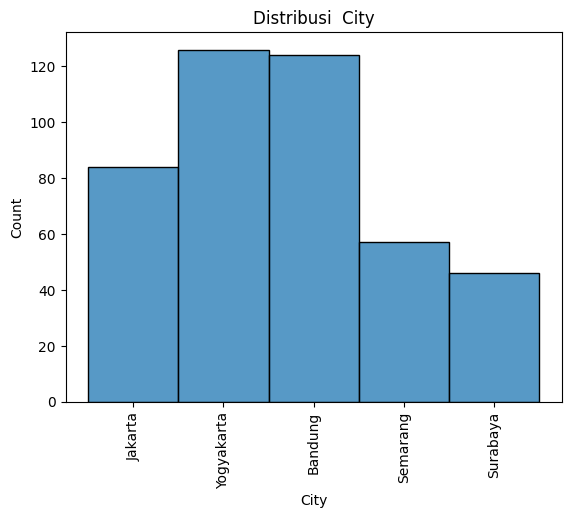

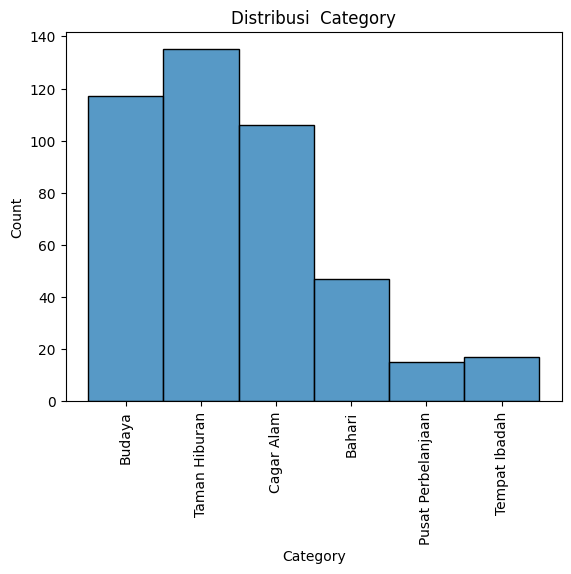

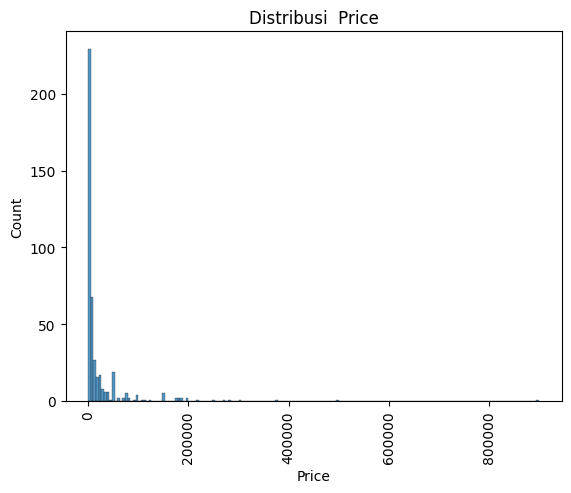

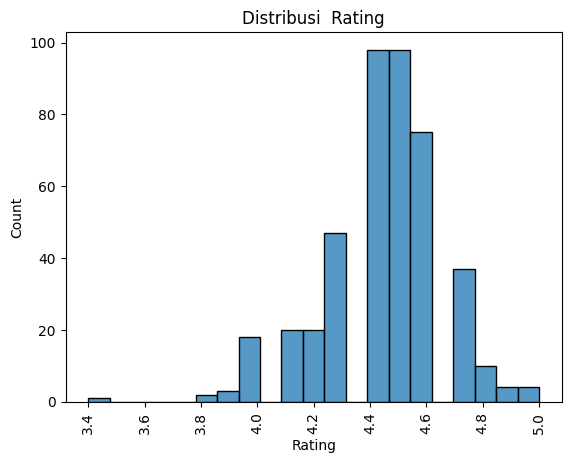

In [156]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribusi nilai

for col in ["City", "Category",  "Price", "Rating"]:
  plt.title(f'Distribusi  {col}')
  sns.histplot(data=destinasi[col], label=col, fill=True)
  plt.xticks(rotation=90)
  plt.show()

In [157]:
destinasi["City"].value_counts()

City
Yogyakarta    126
Bandung       124
Jakarta        84
Semarang       57
Surabaya       46
Name: count, dtype: int64

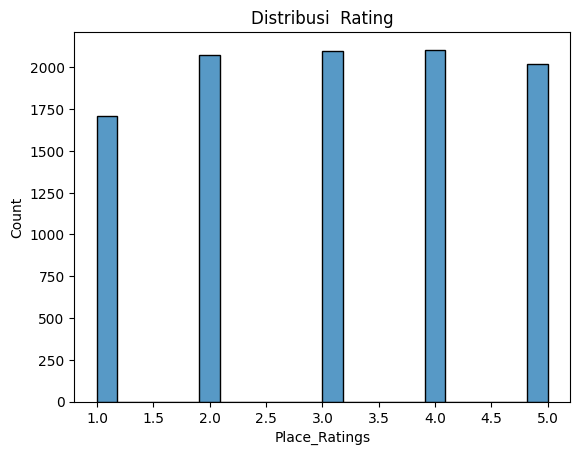

In [158]:
plt.title(f'Distribusi  Rating')
sns.histplot(data=rating["Place_Ratings"], label=col, fill=True)
plt.show()

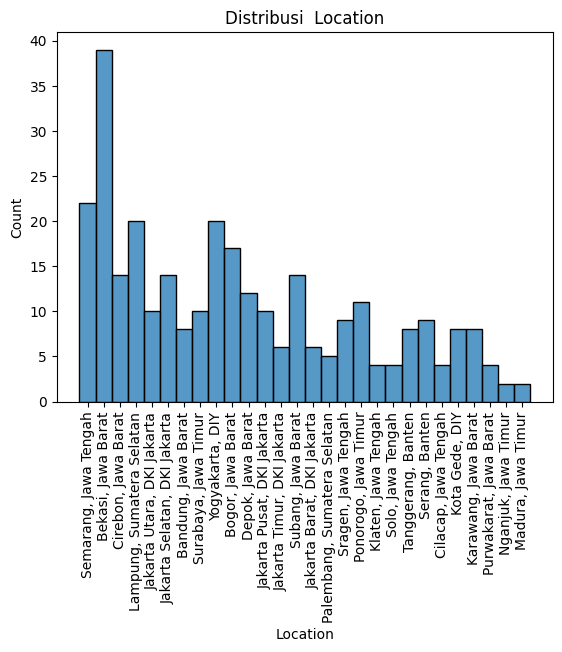

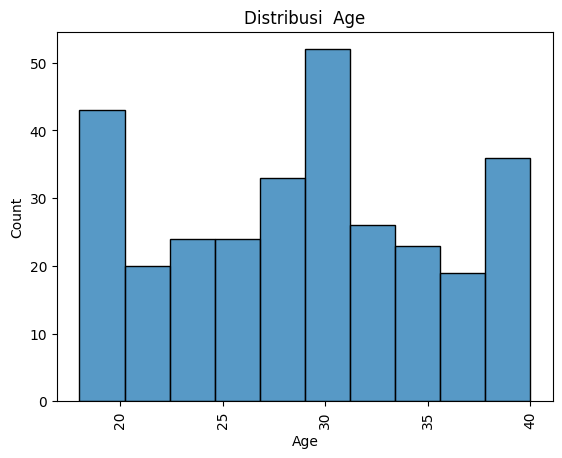

In [159]:

for col in ["Location", "Age"]:
  plt.title(f'Distribusi  {col}')
  sns.histplot(data=user[col], label=col, fill=True)
  plt.xticks(rotation=90)
  plt.show()

In [160]:
user["Location"].value_counts()

Location
Bekasi, Jawa Barat              39
Semarang, Jawa Tengah           22
Lampung, Sumatera Selatan       20
Yogyakarta, DIY                 20
Bogor, Jawa Barat               17
Cirebon, Jawa Barat             14
Jakarta Selatan, DKI Jakarta    14
Subang, Jawa Barat              14
Depok, Jawa Barat               12
Ponorogo, Jawa Timur            11
Jakarta Utara, DKI Jakarta      10
Surabaya, Jawa Timur            10
Jakarta Pusat, DKI Jakarta      10
Sragen, Jawa Tengah              9
Serang, Banten                   9
Bandung, Jawa Barat              8
Karawang, Jawa Barat             8
Kota Gede, DIY                   8
Tanggerang, Banten               8
Jakarta Timur, DKI Jakarta       6
Jakarta Barat, DKI Jakarta       6
Palembang, Sumatera Selatan      5
Solo, Jawa Tengah                4
Klaten, Jawa Tengah              4
Cilacap, Jawa Tengah             4
Purwakarat, Jawa Barat           4
Nganjuk, Jawa Timur              2
Madura, Jawa Timur               2
Name: count

### Outliers Detection

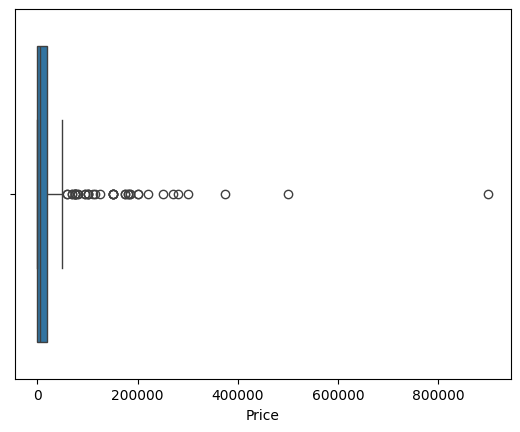

In [161]:
sns.boxplot(x="Price", data=destinasi)
plt.show()

## 4. Data Preparation

### Missing Value Handling

In [162]:
# Fill missing value pada fitur time_minutes dengan mean
time_minutes_mean = destinasi["Time_Minutes"].mean()
destinasi["Time_Minutes"].fillna(time_minutes_mean, inplace=True)
destinasi.isna().sum()

Place_Id          0
Place_Name        0
Description       0
Category          0
City              0
Price             0
Rating            0
Time_Minutes      0
Coordinate        0
Lat               0
Long              0
Unnamed: 11     437
Unnamed: 12       0
dtype: int64

### Feature Selection

Fitur yang akan didrop adalah Description, Rating, Coordinate, Lat, Long, Unnamed: 11, Unnamed: 12.
- Description didrop karena hanya memberikan keterangan destinasi sehingga tidak berpengaruh dalam model sistem rekomendasi. Informasi penting dari description telah terdapat pada category dan city.
- Rating didrop karena data rating yang lebih detail ada pada dataset rating sehingga data yang digunakan nantinya adalah data pada dataset rating yang mampu menggambarkan preferensi pengguna dengan lebih baik.
- Coordinate, lat, dan long didrop karena telah terdapat fitur city yang lebih informatif untuk memberikan keterangan lokasi.
- Unnamed: 11 dan Unnamed: 12 didrop karena tidak memberikan informasi apa-apa.

In [163]:
destinasi.drop(columns=["Description", "Rating", "Coordinate", "Lat", "Long", "Unnamed: 11", "Unnamed: 12"], inplace=True)
destinasi.head()

,Place_Id,Place_Name,Category,City,Price,Time_Minutes
0,1,Monumen Nasional,Budaya,Jakarta,20000,15.000000
1,2,Kota Tua,Budaya,Jakarta,0,90.000000
2,3,Dunia Fantasi,Taman Hiburan,Jakarta,270000,360.000000
3,4,Taman Mini Indonesia Indah (TMII),Taman Hiburan,Jakarta,10000,82.609756
4,5,Atlantis Water Adventure,Taman Hiburan,Jakarta,94000,60.000000


### Feature Engineering
Format data yang digunakan adalah setiap instance hanya memiliki satu nilai Category.

In [164]:
# Nilai category pada setiap instance telah unique, tetapi terdapat space yang bisa menyebabkan Value akan terpisah pada saat Tf-idf vectorization. Untuk
# itu perlu dilakukan pemrosesan dalam menggabungkan value category tanpa space

destinasi["Category"].unique()

array(['Budaya', 'Taman Hiburan', 'Cagar Alam', 'Bahari',
       'Pusat Perbelanjaan', 'Tempat Ibadah'], dtype=object)

In [165]:
def format_category(cat):
  cat_arr = cat.split(' ')
  return ('_').join(cat_arr)

In [166]:
destinasi["Category"] = destinasi["Category"].apply(format_category)
destinasi["Category"].unique()

array(['Budaya', 'Taman_Hiburan', 'Cagar_Alam', 'Bahari',
       'Pusat_Perbelanjaan', 'Tempat_Ibadah'], dtype=object)

In [167]:
# Scaling Price using MinMaxScaling
min_price = destinasi["Price"].min()
max_price = destinasi["Price"].max()

def min_max_scale_price(x):
  return (x-min_price)/(max_price-min_price)

# Scaling rating
destinasi["Price"] = destinasi["Price"].apply(min_max_scale_price)
destinasi.describe()


,Place_Id,Price,Time_Minutes
count,437.000000,437.000000,437.000000
mean,219.000000,0.027391,82.609756
std,126.295289,0.073829,36.165990
min,1.000000,0.000000,10.000000
25%,110.000000,0.000000,82.609756
50%,219.000000,0.005556,82.609756
75%,328.000000,0.022222,82.609756
max,437.000000,1.000000,360.000000


In [168]:
# Scaling rating using MinMaxScaling
min_rate = rating["Place_Ratings"].min()
max_rate = rating["Place_Ratings"].max()

def min_max_scale_rate(x):
  return (x-min_rate)/(max_rate-min_rate)

# Scaling rating
rating["Place_Ratings"] = rating["Place_Ratings"].apply(min_max_scale_rate)
rating.describe()


,User_Id,Place_Id,Place_Ratings
count,10000.000000,10000.000000,10000.000000
mean,151.292700,219.416400,0.516625
std,86.137374,126.228335,0.344988
min,1.000000,1.000000,0.000000
25%,77.000000,108.750000,0.250000
50%,151.000000,220.000000,0.500000
75%,226.000000,329.000000,0.750000
max,300.000000,437.000000,1.000000


### TF-IDF Vectorizer

In [169]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Inisialisasi TfidfVectorizer
tf_idf = TfidfVectorizer()

In [170]:
## Category

# Fit dan transformasi ke dalam bentuk matriks
tf_idf_matrix_category = tf_idf.fit_transform(destinasi['Category'])

# Melihat ukuran matrix tfidf
tf_idf_matrix_category.shape

(437, 6)

In [171]:
tf_idf_category_df = pd.DataFrame(
  tf_idf_matrix_category.todense(),
  columns=tf_idf.get_feature_names_out(),
  index=destinasi["Place_Name"]
)

In [172]:
tf_idf_category_df

,bahari,budaya,cagar_alam,pusat_perbelanjaan,taman_hiburan,tempat_ibadah
Place_Name,,,,,,
Monumen Nasional,0.0,1.0,0.0,0.0,0.0,0.0
Kota Tua,0.0,1.0,0.0,0.0,0.0,0.0
Dunia Fantasi,0.0,0.0,0.0,0.0,1.0,0.0
Taman Mini Indonesia Indah (TMII),0.0,0.0,0.0,0.0,1.0,0.0
Atlantis Water Adventure,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...
Museum Mpu Tantular,0.0,1.0,0.0,0.0,0.0,0.0
Taman Bungkul,0.0,0.0,0.0,0.0,1.0,0.0
Taman Air Mancur Menari Kenjeran,0.0,0.0,0.0,0.0,1.0,0.0


In [173]:
## City

# Fit dan transformasi ke dalam bentuk matriks
tf_idf_matrix_city = tf_idf.fit_transform(destinasi['City'])

# Melihat ukuran matrix tfidf
tf_idf_matrix_city.shape

(437, 5)

In [174]:
tf_idf_city_df = pd.DataFrame(
  tf_idf_matrix_city.todense(),
  columns=tf_idf.get_feature_names_out(),
  index=destinasi["Place_Name"]
)

In [175]:
tf_idf_city_df

,bandung,jakarta,semarang,surabaya,yogyakarta
Place_Name,,,,,
Monumen Nasional,0.0,1.0,0.0,0.0,0.0
Kota Tua,0.0,1.0,0.0,0.0,0.0
Dunia Fantasi,0.0,1.0,0.0,0.0,0.0
Taman Mini Indonesia Indah (TMII),0.0,1.0,0.0,0.0,0.0
Atlantis Water Adventure,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...
Museum Mpu Tantular,0.0,0.0,0.0,1.0,0.0
Taman Bungkul,0.0,0.0,0.0,1.0,0.0
Taman Air Mancur Menari Kenjeran,0.0,0.0,0.0,1.0,0.0


In [176]:
import numpy as np
from scipy.sparse import hstack, csr_matrix

tf_idf_matrix = hstack([tf_idf_matrix_category, tf_idf_matrix_city, csr_matrix(destinasi["Price"].values.reshape(-1, 1))])
tf_idf_matrix.todense()

matrix([[0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.02222222],
        [0.        , 1.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.3       ],
        ...,
        [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
         0.01111111]])

### Encoding

In [177]:
# Mengubah User_Id menjadi list tanpa nilai yang sama
user_ids = rating['User_Id'].unique().tolist()
print('list User_Id: ', user_ids)

# Melakukan encoding User_Id
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded User_Id : ', user_to_user_encoded)

# Melakukan proses encoding angka ke ke User_Id
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke User_Id: ', user_encoded_to_user)

# Mengubah Place_Id menjadi list tanpa nilai yang sama
place_ids = rating['Place_Id'].unique().tolist()
print('list Place_Id: ', place_ids)

# Melakukan encoding Place_Id
place_to_place_encoded = {x: i for i, x in enumerate(place_ids)}
print('encoded Place_Id : ', place_to_place_encoded)

# Melakukan proses encoding angka ke ke Place_Id
place_encoded_to_place = {i: x for i, x in enumerate(place_ids)}
print('encoded angka ke Place_Id: ', place_encoded_to_place)

list User_Id:  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 21

In [178]:
rating["user"] = rating["User_Id"].map(user_to_user_encoded)
rating["place"] = rating["Place_Id"].map(place_to_place_encoded)

## 5. Modeling

### Content-Based Filtering

In [179]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(tf_idf_matrix)
cosine_sim

array([[1.00000000e+00, 9.99876566e-01, 4.92315985e-01, ...,
        0.00000000e+00, 0.00000000e+00, 1.23437742e-04],
       [9.99876566e-01, 1.00000000e+00, 4.89115988e-01, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.92315985e-01, 4.89115988e-01, 1.00000000e+00, ...,
        4.89115988e-01, 4.89115988e-01, 1.63033631e-03],
       ...,
       [0.00000000e+00, 0.00000000e+00, 4.89115988e-01, ...,
        1.00000000e+00, 1.00000000e+00, 4.99984569e-01],
       [0.00000000e+00, 0.00000000e+00, 4.89115988e-01, ...,
        1.00000000e+00, 1.00000000e+00, 4.99984569e-01],
       [1.23437742e-04, 0.00000000e+00, 1.63033631e-03, ...,
        4.99984569e-01, 4.99984569e-01, 1.00000000e+00]])

In [180]:
cosine_df = pd.DataFrame(cosine_sim, index=destinasi["Place_Name"], columns=destinasi["Place_Name"])

In [181]:
cosine_df

Place_Name,Monumen Nasional,Kota Tua,Dunia Fantasi,Taman Mini Indonesia Indah (TMII),Atlantis Water Adventure,Taman Impian Jaya Ancol,Kebun Binatang Ragunan,Ocean Ecopark,Pelabuhan Marina,Pulau Tidung,...,Monumen Bambu Runcing Surabaya,House of Sampoerna,Atlantis Land Surabaya,Taman Hiburan Rakyat,Taman Mundu,Museum Mpu Tantular,Taman Bungkul,Taman Air Mancur Menari Kenjeran,Taman Flora Bratang Surabaya,Gereja Perawan Maria Tak Berdosa Surabaya
Place_Name,,,,,,,,,,,,,,,,,,,,,
Monumen Nasional,1.000000,0.999877,0.492316,0.500046,0.499738,0.500150,0.499985,0.497213,0.497419,0.498341,...,0.499938,0.499938,0.001536,0.000062,0.000000,0.499962,0.000000,0.000000,0.000000,0.000123
Kota Tua,0.999877,1.000000,0.489116,0.499985,0.498642,0.499904,0.499998,0.495074,0.495340,0.496564,...,0.500000,0.500000,0.000000,0.000000,0.000000,0.499999,0.000000,0.000000,0.000000,0.000000
Dunia Fantasi,0.492316,0.489116,1.000000,0.979832,0.990859,0.982119,0.489766,0.997652,0.512823,0.510042,...,0.000000,0.000000,0.507056,0.489927,0.489116,0.000326,0.489116,0.489116,0.489116,0.001630
Taman Mini Indonesia Indah (TMII),0.500046,0.499985,0.979832,1.000000,0.997832,0.999931,0.500007,0.991217,0.496395,0.497468,...,0.000000,0.000000,0.498359,0.500012,0.499985,0.000012,0.499985,0.499985,0.499985,0.000062
Atlantis Water Adventure,0.499738,0.498642,0.990859,0.997832,1.000000,0.998538,0.498871,0.997772,0.504027,0.503835,...,0.000000,0.000000,0.503453,0.498927,0.498642,0.000116,0.498642,0.498642,0.498642,0.000579
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Museum Mpu Tantular,0.499962,0.499999,0.000326,0.000012,0.000116,0.000031,0.000005,0.000220,0.000214,0.000184,...,0.999999,0.999999,0.497759,0.500002,0.499999,1.000000,0.499999,0.499999,0.499999,0.499996
Taman Bungkul,0.000000,0.000000,0.489116,0.499985,0.498642,0.499904,0.000000,0.495074,0.000000,0.000000,...,0.500000,0.500000,0.995212,0.999992,1.000000,0.499999,1.000000,1.000000,1.000000,0.499985
Taman Air Mancur Menari Kenjeran,0.000000,0.000000,0.489116,0.499985,0.498642,0.499904,0.000000,0.495074,0.000000,0.000000,...,0.500000,0.500000,0.995212,0.999992,1.000000,0.499999,1.000000,1.000000,1.000000,0.499985


In [182]:
def destination_recommendations(nama_tempat, similarity_data=cosine_df, items=destinasi[['Place_Name', 'Category', "City", "Price"]], k=5):
      """
      Rekomendasi Tempat Wisata berdasarkan kemiripan dataframe

      Parameter:
      ---
      nama_tempat : tipe data string (str)
                  Nama Tempat (index kemiripan dataframe)
      similarity_data : tipe data pd.DataFrame (object)
                        Kesamaan dataframe, simetrik, dengan resto sebagai
                        indeks dan kolom
      items : tipe data pd.DataFrame (object)
              Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
      k : tipe data integer (int)
          Banyaknya jumlah rekomendasi yang diberikan
      ---


      Pada index ini, kita mengambil k dengan nilai similarity terbesar
      pada index matrix yang diberikan (i).
      """


      # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan
      # Dataframe diubah menjadi numpy
      # Range(start, stop, step)
      index = similarity_data.loc[:,nama_tempat].to_numpy().argpartition(
          range(-1, -k, -1))

      # Mengambil data dengan similarity terbesar dari index yang ada
      closest = similarity_data.columns[index[-1:-(k+2):-1]]

      # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
      closest = closest.drop(nama_tempat, errors='ignore')

      return pd.DataFrame(closest).merge(items).head(k)

In [183]:
target_destinasi = destinasi[destinasi["Place_Name"]=="Kota Tua"][["Place_Name", "Category", "City", "Price"]]
recommendation = destination_recommendations("Kota Tua")

In [184]:
print("Destinasi input")
target_destinasi

Destinasi input


,Place_Name,Category,City,Price
1,Kota Tua,Budaya,Jakarta,0.0


In [185]:
print("Top-5 Recommendation")
recommendation

Top-5 Recommendation


,Place_Name,Category,City,Price
0,Galeri Nasional Indonesia,Budaya,Jakarta,0.0
1,Jembatan Kota Intan,Budaya,Jakarta,0.0
2,Perpustakaan Nasional,Budaya,Jakarta,0.0
3,Freedom Library,Budaya,Jakarta,0.0
4,Museum Tengah Kebun,Budaya,Jakarta,0.0


### Collaborative Filtering

In [186]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [187]:
# Split Data
from sklearn.model_selection import train_test_split


X = rating[["user", "place"]].values
y = rating['Place_Ratings'].values


X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [188]:
# Init variable
num_users = len(rating["User_Id"])
num_places = len(rating["Place_Id"])

print("num_user:", num_users)
print("num_places:", num_places)

num_user: 10000
num_places: 10000


In [189]:
class RecommenderNet(tf.keras.Model):
  #Inisialisasi
  def __init__(self, num_users, num_places, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_places = num_places
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding(
        num_users,
        embedding_size,
        embeddings_initializer = "he_normal",
        embeddings_regularizer = keras.regularizers.l2()
    )
    self.user_bias = layers.Embedding(num_users, 1)
    self.place_embedding = layers.Embedding(
        num_places,
        embedding_size,
        embeddings_initializer = "he_normal",
        embeddings_regularizer = keras.regularizers.l2()
    )
    self.place_bias = layers.Embedding(num_users, 1)

  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:, 0])
    user_bias = self.user_bias(inputs[:, 0])
    place_vector = self.place_embedding(inputs[:, 1])
    place_bias = self.place_bias(inputs[:, 1])

    dot_user_place = tf.tensordot(user_vector, place_vector, 2)

    x = dot_user_place + user_bias +place_bias

    return tf.nn.sigmoid(x)


In [190]:
model = RecommenderNet(num_users, num_places, 50) #Inisialisasi model

# Model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics = [tf.keras.metrics.RootMeanSquaredError()]
)

In [191]:
# Training

history = model.fit(
    x=X_train,
    y = y_train,
    batch_size = 30,
    epochs = 30,
    validation_data = (X_val, y_val)
)

Epoch 1/30
267/267 [==============================] - 4s 10ms/step - loss: 0.7534 - root_mean_squared_error: 0.3458 - val_loss: 0.6926 - val_root_mean_squared_error: 0.3430
Epoch 2/30
267/267 [==============================] - 1s 6ms/step - loss: 0.6904 - root_mean_squared_error: 0.3438 - val_loss: 0.6923 - val_root_mean_squared_error: 0.3427
Epoch 3/30
267/267 [==============================] - 2s 6ms/step - loss: 0.6879 - root_mean_squared_error: 0.3421 - val_loss: 0.6922 - val_root_mean_squared_error: 0.3427
Epoch 4/30
267/267 [==============================] - 1s 5ms/step - loss: 0.6857 - root_mean_squared_error: 0.3405 - val_loss: 0.6922 - val_root_mean_squared_error: 0.3427
Epoch 5/30
267/267 [==============================] - 1s 5ms/step - loss: 0.6837 - root_mean_squared_error: 0.3390 - val_loss: 0.6923 - val_root_mean_squared_error: 0.3428
Epoch 6/30
267/267 [==============================] - 2s 7ms/step - loss: 0.6820 - root_mean_squared_error: 0.3377 - val_loss: 0.6925 - val

In [192]:
user_id = rating["User_Id"].sample(1).iloc[0]
place_visited_by_user = rating[rating["User_Id"]==user_id]

place_not_visited = destinasi[~destinasi["Place_Id"].isin(place_visited_by_user["Place_Id"].values)]["Place_Id"]

place_not_visited = list(
    set(place_not_visited).intersection(set(place_to_place_encoded.keys()))
)

place_not_visited = [[place_to_place_encoded.get(x) ] for x in place_not_visited]
user_encoder = user_to_user_encoded.get(user_id)

user_place_array = np.hstack(
    ([[user_encoder]]*len(place_not_visited), place_not_visited)
)

In [193]:
ratings = model.predict(user_place_array).flatten()

top_ratings_indices = ratings.argsort()[-5:][::-1]
recommended_place_ids = [
    place_encoded_to_place.get(place_not_visited[x][0]) for x in top_ratings_indices
]

print('Showing recommendations for users: {}'.format(user_id))
print('===' * 9)
print('Destination with high ratings from user')
print('----' * 8)

top_place_user = (
    place_visited_by_user.sort_values(
        by = 'Place_Ratings',
        ascending=False
    )
    .head(5)
    .Place_Id.values
)

destinasi_rows = destinasi[destinasi['Place_Id'].isin(top_place_user)]
for row in destinasi_rows.itertuples():
    print(row.Place_Name, ':', row.Category, ",", row.City, ",", row.Price)

print('----' * 8)
print('Top 5 destination recommendation')
print('----' * 8)

recommended_place = destinasi[destinasi['Place_Id'].isin(recommended_place_ids)]
for row in recommended_place.itertuples():
    print(row.Place_Name, ':', row.Category, ",", row.City, ",", row.Price)

13/13 [==============================] - 0s 2ms/step
Showing recommendations for users: 20
Destination with high ratings from user
--------------------------------
Pantai Ngandong : Bahari , Yogyakarta , 0.011111111111111112
Alun-Alun Kota Bandung : Taman_Hiburan , Bandung , 0.0
Masjid Pusdai : Tempat_Ibadah , Bandung , 0.0
Taman Miniatur Kereta Api : Taman_Hiburan , Bandung , 0.016666666666666666
Kota Lama Semarang : Budaya , Semarang , 0.0
--------------------------------
Top 5 destination recommendation
--------------------------------
Kampung Cina : Budaya , Jakarta , 0.016666666666666666
Monumen Yogya Kembali : Budaya , Yogyakarta , 0.016666666666666666
Puncak Gunung Api Purba - Nglanggeran : Cagar_Alam , Yogyakarta , 0.011111111111111112
Sanghyang Heuleut : Cagar_Alam , Bandung , 0.011111111111111112
Keraton Surabaya : Budaya , Surabaya , 0.0


## 6. Evaluasi

### Content-Based Filtering

In [194]:
n_test = round(0.2*len(destinasi))
place_testing = destinasi["Place_Name"].sample(n_test).values

In [195]:
relevant = 0

for place in place_testing:
  target_destinasi = destinasi[destinasi["Place_Name"]==place][["Place_Name", "Category", "City", "Price"]]
  recommendation = destination_recommendations(place)
  # Count the number of relevant recommendation
  for rec in recommendation.itertuples():
    if (rec.Category == target_destinasi["Category"].values):
      relevant += 1
    if (rec.City == target_destinasi["City"].values):
      relevant += 1
    relevant += (1-abs(rec.Price-target_destinasi["Price"].values))

print("Precision:", (relevant/(3*5*n_test))[0])

Precision: 0.9945602383993186


### Collaborative Filtering

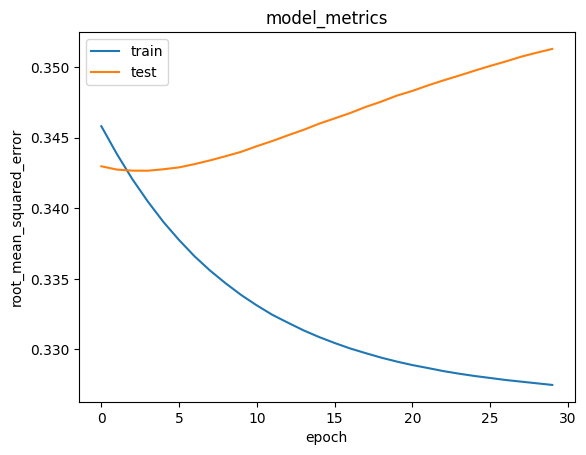

In [197]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()